In [10]:
%load_ext autoreload
%autoreload 2
import torch
import numpy as np
from pathlib import Path
import jutils
from model import Diffusion, VarianceScheduler
from network import UNet
from torchvision.transforms.functional import to_pil_image, to_tensor

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
device = "cuda:0"
net = UNet(1000, ch=128, ch_mult=[1,2,2,2], attn=[1], num_res_blocks=4, dropout=0.1)
var_scheduler = VarianceScheduler(1000)
model = Diffusion(net, var_scheduler)
ckpt = torch.load("./results/06-29-145005/last.ckpt", map_location="cpu")
model.load_state_dict(ckpt)

model.eval()
model = model.to(device)
for p in model.parameters(): p.requires_grad_(False)

In [17]:
samples = model.ddim_sample(4, 50)


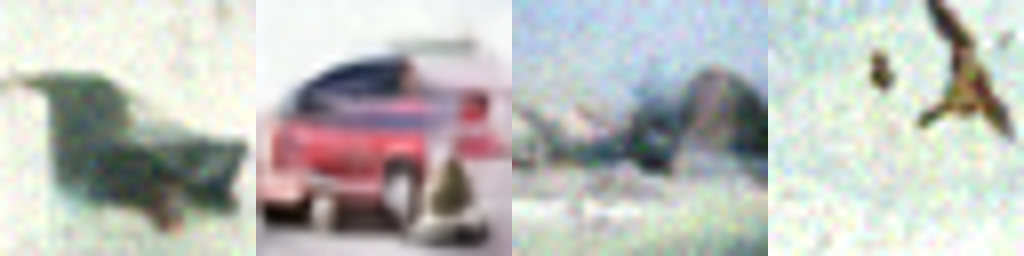

In [18]:
samples2 = torch.clamp(samples, 0, 1)
imgs = [to_pil_image(samples2[i]).resize((256,256)) for i in range(len(samples2))]
jutils.imageutil.merge_images(imgs)